In [1]:
if __name__=="__main__":
	import sys
	sys.path.append('/Users/baljyot/Documents/CODE/GitHub_t2/Baljyot_EXP_RPOC/Scripts')
	
from src.SMT_Analysis_BP.databases.trajectory_analysis_script import *
from scipy.interpolate import griddata
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from scipy.stats import gaussian_kde
import pandas as pd
import os
import datetime
import numpy as np
from src.SMT_Analysis_BP.helpers.MSD_Utils import *
from src.SMT_Analysis_BP.helpers.plotting_functions import *
from src.SMT_Analysis_BP.helpers.import_functions import *
from src.SMT_Analysis_BP.helpers.Analysis_functions import *
from src.SMT_Analysis_BP.helpers.diff_mw import *
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from src.SMT_Analysis_BP.Random.scalebars import *
from src.SMT_Analysis_BP.Random.Convert_csv_mat import *
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy import stats, ndimage
from skimage import io
import json
import matplotlib.gridspec as gs
import csv  
from sklearn.cluster import OPTICS
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')  
from sklearn.cluster import DBSCAN
from cgitb import small
import src.SMT_Analysis_BP.helpers.smallestenclosingcircle as smallestenclosingcircle
import math
import src.SMT_Analysis_BP.Random.guassian_fit as gaussian_fit
import src.SMT_Analysis_BP.helpers.fbm_utility as fbm_utility
import src.SMT_Analysis_BP.helpers.simulate_foci as simulate_foci
import src.SMT_Analysis_BP.helpers.simulate_cells as simulate_cells
import src.SMT_Analysis_BP.helpers.SMT_converters as smt
import matplotlib.patches as mpatches
import pickle
import src.SMT_Analysis_BP.Parameter_Store.global_params as param_store
globals = param_store.PIXELSIZES
from warnings import filterwarnings
filterwarnings('ignore',module="DeprecationWarning")
#ignore deprecated warnings
#ignore stacklevel=2 warnings

/var/folders/_t/qlzp5l894v16vmr8m_81x5x80000gn/T/ipykernel_1056/3573062477.py:42: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [2]:
#lets load the *.tif files from the path (12 samples each)
path = "/Users/baljyot/Documents/Photon_Conversion_Factor/20230929/12_exposures_test/"

files_paths_unsorted = glob.glob(path + "*.tif")
#now sort these files based on alphanumeric order
files_paths = sorted(files_paths_unsorted, key=lambda x:float(re.findall("(\d+)",x)[0]))
#take only the first 12 files
#files_paths = files_paths[36:48]
repeats = int(len(files_paths)/12.)
print("Number of repeats: ", repeats)

#now we need to reorder based on the repeats
repeat_file_paths = np.array(files_paths).reshape(repeats,12)


Number of repeats:  4


In [10]:
#define a util function to read the files and find the avg intensity and the variance of the intensity
def read_files_and_find_avg_var(files):
    #read the files
    images = [io.imread(file) for file in files]
    #find the average intensity
    avg_intensities = np.array([np.mean(image[:,:,0]) for image in images])
    #find the variance of the intensity
    var_intensities = np.array([np.var(image[:,:,0]) for image in images])
    return avg_intensities, var_intensities

#now we need to find the avg intensity and the variance of the intensity for each repeat
avg_intensities_repeats = []
var_intensities_repeats = []
for repeat in repeat_file_paths:
    avg_intensities, var_intensities = read_files_and_find_avg_var(repeat)
    avg_intensities_repeats.append(avg_intensities)
    var_intensities_repeats.append(var_intensities)


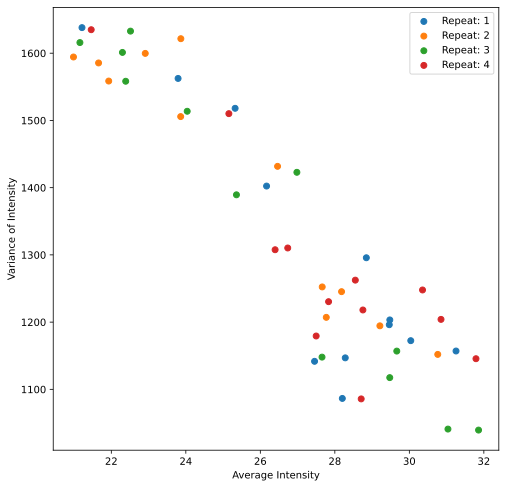

In [18]:
#plot the variance vs the avg intensity
fig, ax = plt.subplots(1,1,figsize=(8,8))
for i in range(len(avg_intensities_repeats)):
    ax.scatter(avg_intensities_repeats[i]-100,var_intensities_repeats[i], label="Repeat: "+str(i+1))
ax.set_xlabel("Average Intensity")
ax.set_ylabel("Variance of Intensity")
ax.legend()
# ax.set_xscale("log")
# ax.set_yscale("log")
plt.show()


In [16]:
#find the line of best fit for each repeat
slope = []
intercept = []
for i in range(len(avg_intensities_repeats)):
    slope.append(np.polyfit(avg_intensities_repeats[i]-100,var_intensities_repeats[i],1)[0])
    intercept.append(np.polyfit(avg_intensities_repeats[i]-100,var_intensities_repeats[i],1)[1])

print("Slope: ", np.array(slope))
print("Intercept: ", intercept)
print(avg_intensities_repeats)

Slope:  [-57.56429353 -53.71817402 -61.05537777 -47.38243638]
Intercept:  [2874.0394662984163, 2778.883458075617, 2952.824398670637, 2597.1850798790797]
[array([128.84553146, 129.46127701, 127.45571899, 129.47581863,
       131.25321579, 126.16753006, 125.32312775, 130.03858948,
       128.20081711, 121.21278763, 123.79214859, 128.27961731]), array([129.209095  , 122.91086197, 121.65800095, 127.66127014,
       128.18048859, 130.76301193, 127.77027512, 123.86211395,
       126.46271515, 123.86651993, 120.9844017 , 121.93029022]), array([125.35916138, 129.66284561, 129.47450256, 124.03694916,
       122.2984848 , 122.51496506, 131.03653717, 131.85816574,
       121.15694427, 122.3861618 , 127.65620804, 126.98124313]), array([127.49895096, 128.75328827, 125.1553421 , 131.78868866,
       126.73560333, 128.70750427, 128.54976654, 126.39667892,
       127.83206558, 130.85021591, 121.46012115, 130.35417938])]
